In [1]:
import vaex
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
hdugiants = fits.open('/Users/landerson/Downloads/2686.fits')
giants = Table(hdugiants[1].data)

In [3]:
ds = vaex.from_astropy_table(giants)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
ds['pm'] = np.sqrt(ds.pmra**2 + ds.pmdec**2)
ds['shmag'] = ds.parallax*10**(0.2*ds.phot_g_mean_mag)

In [5]:
vaex.stat.sum(ds.b == 0)

sum((b == 0))

In [6]:
#vaex.stat.count(ds.bp_rp, selection=[ds.parallax == 0])

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


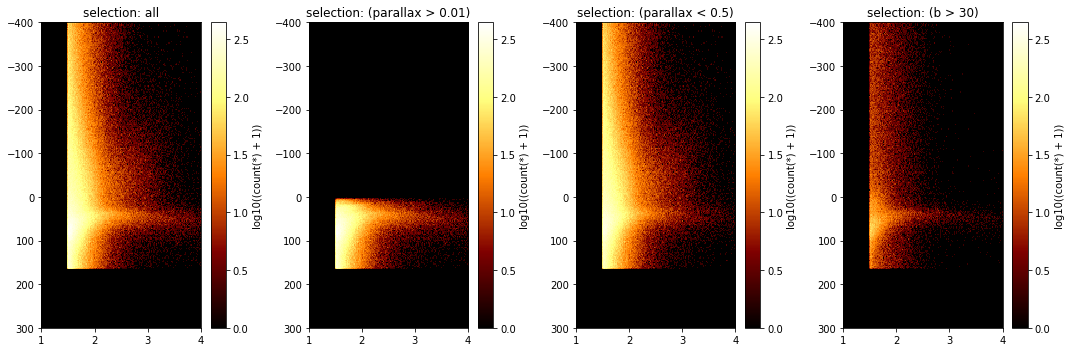

In [7]:
ds.plot(ds.bp_rp, ds.parallax*10**(0.2*ds.phot_g_mean_mag), 
        what=np.log10(vaex.stat.count() + 1), limits=[[1, 4],[300, -400]], 
        selection=[None, ds.parallax > 0.01, ds.parallax < 0.5, ds.b>30], 
        visual=dict(column='selection'), figsize=(15,5)) # , what=vaex.stat.mean(ds.phot_g_mean_mag))

In [8]:
len(ds)

1692995

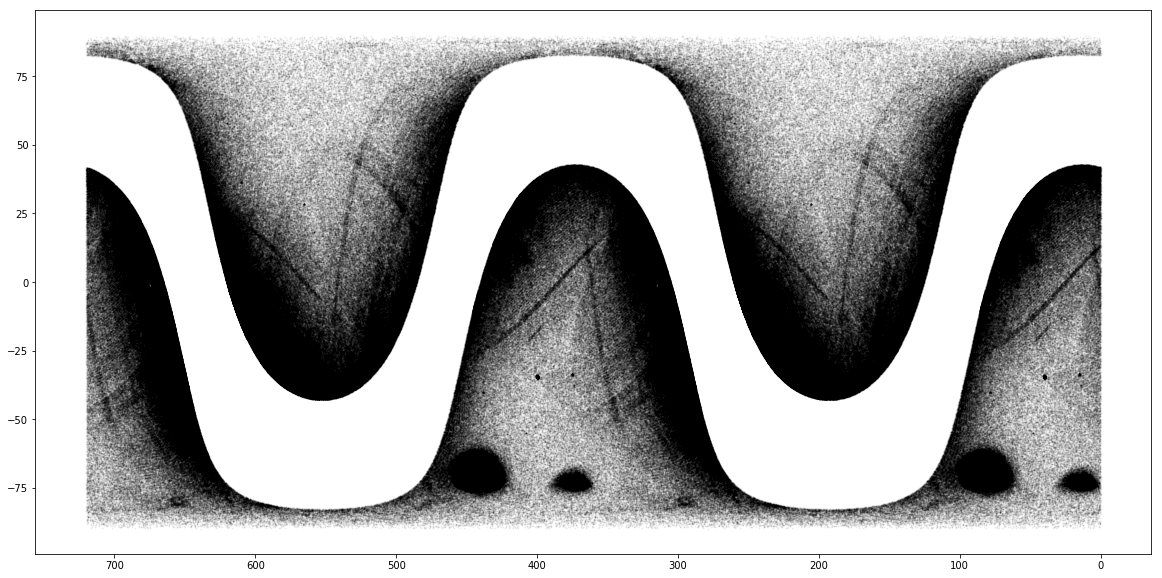

In [9]:
I = ds.bp_rp > 1.2
plt.figure(figsize=(20, 10))
plt.scatter(ds[I].ra.values,ds[I].dec.values, s=1, alpha=0.05, c='black' )
plt.scatter(ds[I].ra.values + 360.,ds[I].dec.values, s=1, alpha=0.05, c='black' )
plt.gca().invert_xaxis()

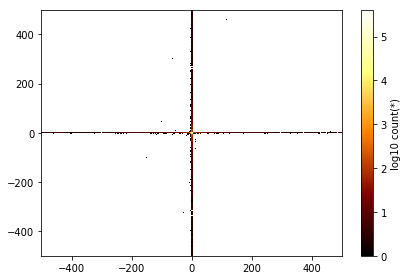

In [14]:
ds.plot(ds.ra, ds.dec, f='log10', limits=[[-500, 500],[-500, 500]]) #, selection=[(ds.bp_rp > 1.0) & (ds.shmag < 250)]) #, what=vaex.stat.count())

In [13]:
ds.b.fillna

<bound method fillna of <vaex.expression.Expression(expressions='b')> instance at 0x1a86bffd0 values=[-35.93973446603485, -32.620829568809675, 40.3561651147, 30.725226302607158, -30.922956905214495 ... (total 3669009 values) ... 27.959015995112313, -33.90734815469274, -47.86373386591377, 25.45438887081279, 25.747288997124645] >

Sigma is 30.000000 arcmin (0.008727 rad) 
-> fwhm is 70.644601 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


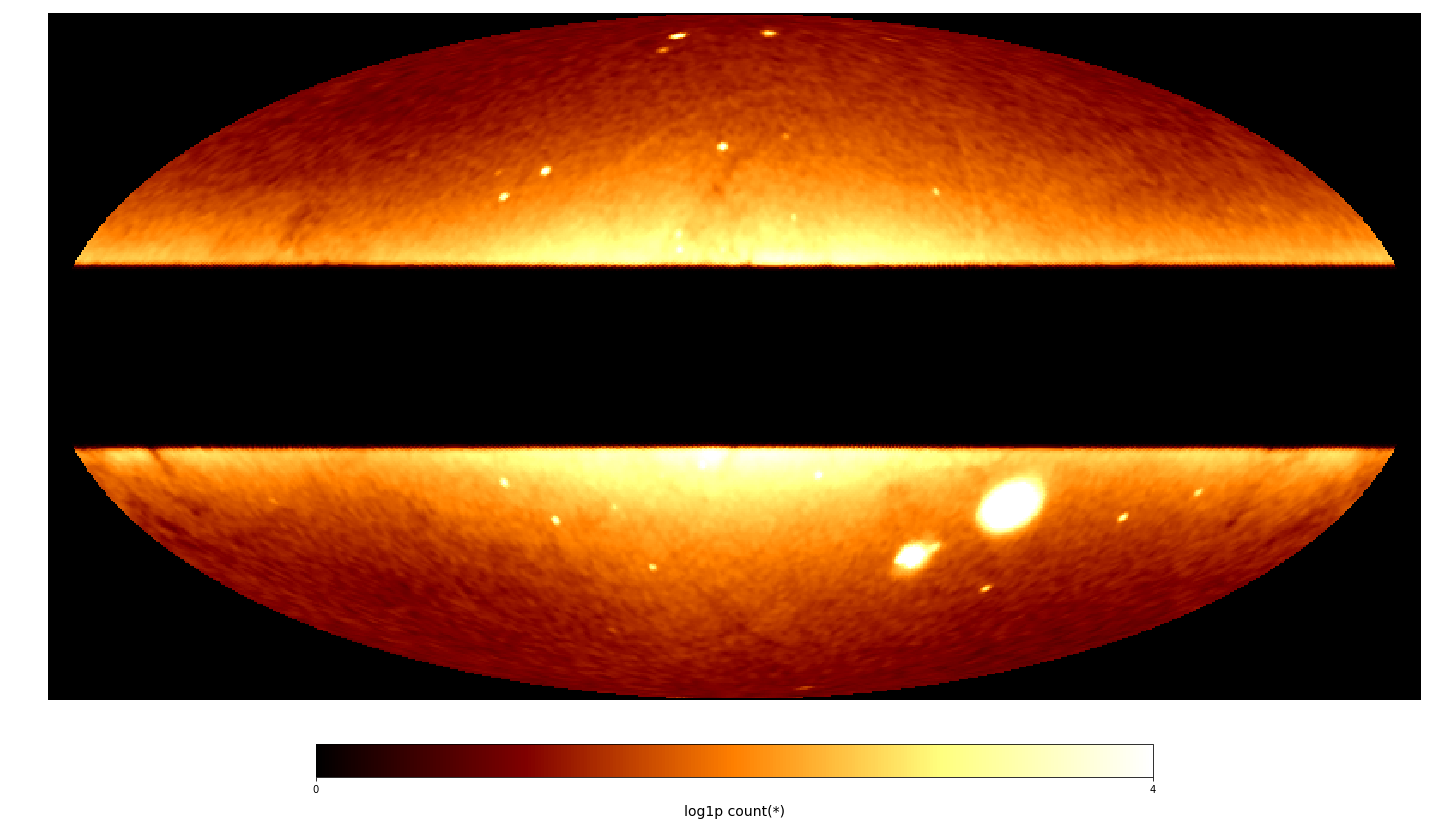

In [18]:
ds.healpix_plot(figsize=(30,15), smooth=0.5, f="log1p", grid_limits=[0, 4], rotation=(0,0,0))# , selection=[ds.b>20])

In [20]:
ds.plot?

Signature: ds.plot(x=None, y=None, z=None, what='count(*)', vwhat=None, reduce=['colormap'], f=None, normalize='normalize', normalize_axis='what', vmin=None, vmax=None, shape=256, vshape=32, limits=None, grid=None, colormap='afmhot', figsize=None, xlabel=None, ylabel=None, aspect='auto', tight_layout=True, interpolation='nearest', show=False, colorbar=True, colorbar_label=None, selection=None, selection_labels=None, title=None, background_color='white', pre_blend=False, background_alpha=1.0, visual={'x': 'x', 'y': 'y', 'layer': 'z', 'fade': 'selection', 'row': 'subspace', 'column': 'what'}, smooth_pre=None, smooth_post=None, wrap=True, wrap_columns=4, return_extra=False, hardcopy=None)
Docstring:
Declarative plotting of statistical plots using matplotlib, supports subplots, selections, layers

Instead of passing x and y, pass a list as x argument for multiple panels. Give what a list of options to have multiple
panels. When both are present then will be origanized in a column/row order